# Corona Mask Detection using CNN
### Name : Nishtha     

Built a Neural Network, to classify "mask" and "without_mask" images. Using OpenCV, I have predicted on each image in a webcam video( whether it belongs to "mask" or "without_mask" image). Surrounded the detected face with a rectangle, and also put a text above that rectangle, depicting whether it is a masked or a non-masked image


## Importing libraries

In [112]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
import keras
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from keras.optimizers import Adam

## Data Preparing

In [115]:
dataPath = "C:\\Users\\Nishtha\\Downloads\\Mask_data"

In [116]:
features = []
target = []
folders = ["without_mask","with_mask"]
for i in range(len(folders)):
    imageNames=os.listdir(dataPath+ "\\" + folders[i])
    for name in imageNames:
            ImageAsArray = cv2.imread(dataPath + "\\" + folders[i] + "\\" + name)
            ImageAsArray = cv2.resize(ImageAsArray,(128,128))
            features.append(ImageAsArray)
            target.append(i)
    print(folders[i],"->",len(imageNames),"images")        

without_mask -> 686 images
with_mask -> 690 images


In [117]:
features = np.array(features)

In [118]:
target = np.array(target)

In [119]:
features.shape

(1376, 128, 128, 3)

In [120]:
target.shape

(1376,)

## Splitting data into train and test dataset

In [121]:
train_features,test_features,train_target,test_target = train_test_split(features, target, test_size = 0.2)

In [122]:
train_features.shape


(1100, 128, 128, 3)

In [123]:
test_features.shape

(276, 128, 128, 3)

In [124]:
def preprocessing(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)    #BGR to grayscale conversion
    img = mg/255                                  normalization
    return img

In [125]:
train_features = list(map(preprocessing,train_features))

In [126]:
test_features = list(map(preprocessing,test_features))

In [127]:
train_features = np.array(train_features)

In [128]:
test_features = np.array(test_features)

In [129]:
train_features.shape

(1100, 128, 128)

In [130]:
test_features.shape

(276, 128, 128)

In [131]:
train_features = train_features.reshape(1100, 128, 128,1)

In [132]:
test_features = test_features.reshape(276, 128, 128,1)

## Generating new images by applying shifts, rotation etc to previous ones

In [133]:
dataGen = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1,rotation_range=10)

In [134]:
dataGen.fit(train_features)

In [135]:
train_features.shape

(1100, 128, 128, 1)

In [136]:
batches = dataGen.flow(train_features, train_target, batch_size = 20)

In [137]:
len(batches)

55

In [138]:
batches

In [139]:
x_batch,y_batch = next(batches)

In [140]:
x_batch.shape

(20, 128, 128, 1)

In [141]:
y_batch.shape

(20,)

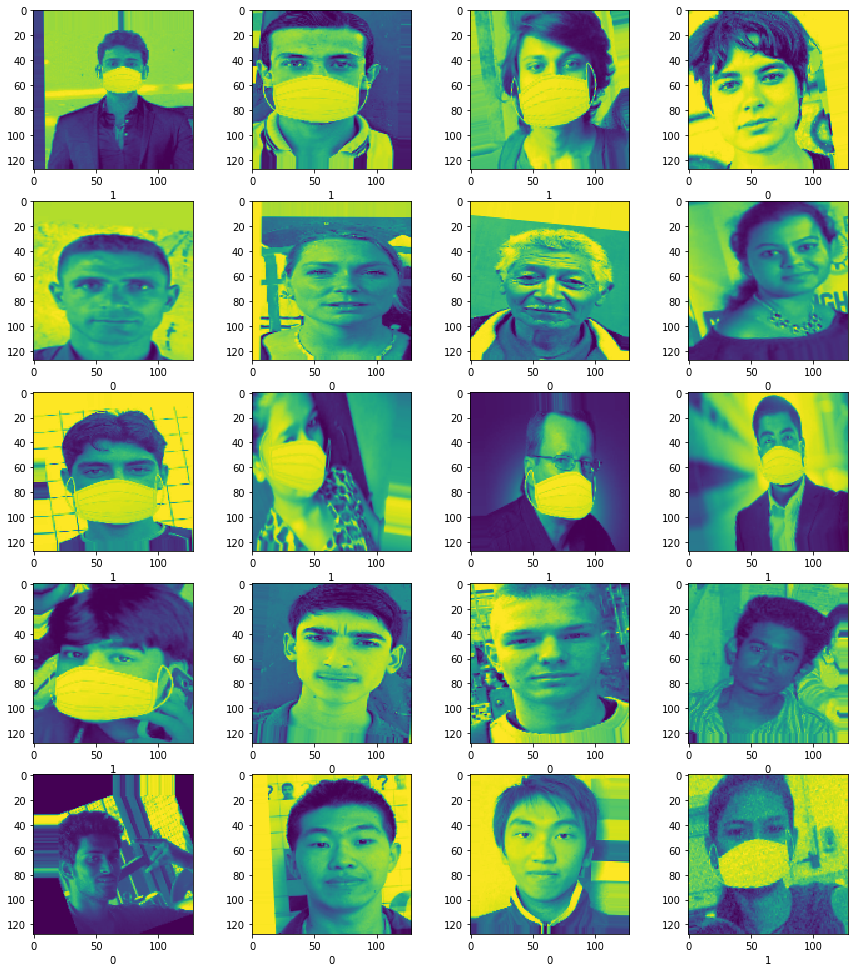

In [142]:
plt.figure(figsize=(15,17))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(x_batch[i].reshape(128,128))
    plt.xlabel(y_batch[i])
plt.show()

In [143]:
train_target.shape

(1100,)

In [144]:
train_target = to_categorical(train_target,2)

In [145]:
test_target = to_categorical(test_target,2)

## Specifying the architecture of the model

In [146]:
def myModel():
    model = Sequential()
    model.add(Conv2D(60,(5,5), input_shape = (128,128,1), activation = "relu"))
    model.add(Conv2D(60,(5,5), activation = "relu"))
    model.add(MaxPooling2D( pool_size = (2,2)))
    model.add(Conv2D(30,(3,3), activation = "relu"))
    model.add(Conv2D(30,(3,3), activation = "relu"))
    model.add(Conv2D(30,(3,3), activation = "relu"))
    model.add(MaxPooling2D( pool_size = (2,2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(500, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation = "softmax"))
    return model

In [36]:
model = myModel()

## Compiling and Fitting the model

In [36]:
model.compile(Adam(lr = 0.001), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [37]:
model.fit(dataGen.flow(train_features, train_target, batch_size = 20), epochs = 20)

Epoch 1/20
55/55 [==============================] - 151s 3s/step - loss: 0.6713 - accuracy: 0.5672
Epoch 2/20
55/55 [==============================] - 147s 3s/step - loss: 0.5386 - accuracy: 0.7547
Epoch 3/20
55/55 [==============================] - 146s 3s/step - loss: 0.3265 - accuracy: 0.8745
Epoch 4/20
55/55 [==============================] - 145s 3s/step - loss: 0.3160 - accuracy: 0.8654
Epoch 5/20
55/55 [==============================] - 148s 3s/step - loss: 0.3177 - accuracy: 0.8680
Epoch 6/20
55/55 [==============================] - 139s 3s/step - loss: 0.2557 - accuracy: 0.8925
Epoch 7/20
55/55 [==============================] - 104s 2s/step - loss: 0.2918 - accuracy: 0.8881
Epoch 8/20
55/55 [==============================] - 104s 2s/step - loss: 0.1651 - accuracy: 0.9353
Epoch 9/20
55/55 [==============================] - 106s 2s/step - loss: 0.1720 - accuracy: 0.9255
Epoch 10/20
55/55 [==============================] - 104s 2s/step - loss: 0.2635 - accuracy: 0.9104
Epoch 11/

In [63]:
model = model.save("Saved_model_95")

INFO:tensorflow:Assets written to: Saved_model_95\assets


In [42]:
model.evaluate(test_features, test_target, batch_size = 20)

14/14 [==============================] - 4s 275ms/step - loss: 0.0792 - accuracy: 0.9819


[0.07921973615884781, 0.9818840622901917]

## Making predictions

In [43]:
predictions = model.predict(test_features)

In [44]:
predictions[0]

array([0.9835128 , 0.01648716], dtype=float32)

In [45]:
np.argmax(predictions[0])

0

In [46]:
test_target[0]

array([1., 0.], dtype=float32)

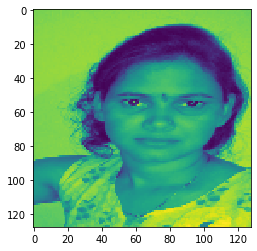

In [47]:
plt.imshow(test_features[0].reshape(128,128))
plt.show()

In [48]:
predictions[20]

array([0.00895788, 0.99104214], dtype=float32)

In [49]:
np.argmax(predictions[20])

1

In [50]:
test_target[20]

array([0., 1.], dtype=float32)

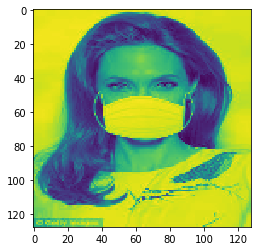

In [51]:
plt.imshow(test_features[20].reshape(128,128))
plt.show()

In [52]:
test_target.shape

(276, 2)

In [53]:
predictions[200]

array([9.249307e-05, 9.999075e-01], dtype=float32)

In [54]:
np.argmax(predictions[200])

1

In [55]:
test_target[200]

array([0., 1.], dtype=float32)

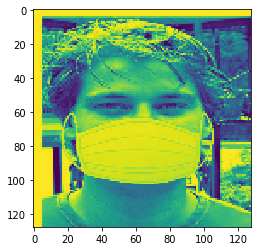

In [56]:
plt.imshow(test_features[200].reshape(128,128))
plt.show()

In [57]:
predictions[165]

array([0.9846176 , 0.01538244], dtype=float32)

In [58]:
np.argmax(predictions[165])

0

In [59]:
test_target[165]

array([1., 0.], dtype=float32)

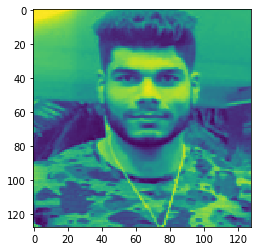

In [60]:
plt.imshow(test_features[165].reshape(128,128))
plt.show()

In [61]:
import cv2

def getClassName(classNo):
    if   classNo == 1: return 'with mask'
    elif classNo == 0: return 'without mask'

## Predicting on webcam images

In [106]:
cascPath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascPath)

In [107]:
font = cv2.FONT_HERSHEY_TRIPLEX

In [108]:
cap = cv2.VideoCapture(0)
cap.set(3,800)
cap.set(4,640)
cap.set(10,300)


False

In [109]:
while True:
    message,imgOriginal = cap.read()
    
    gray = cv2.cvtColor(imgOriginal, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.FONT_HERSHEY_SIMPLEX
    )
    
    for (x, y, w, h) in faces:
        cv2.rectangle(imgOriginal, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    img = np.asarray(imgOriginal)
    img = cv2.resize(img,(128,128))
    img = preprocessing(img)
    img = img.reshape(1,128,128,1)
    cv2.putText(imgOriginal,"Class:",(20,35),font,1,(0,255,0),2)
    cv2.putText(imgOriginal,"Probability:",(20,75),font,1,(0,255,),2)
    probabilities = model.predict(img)
    classIndex = model.predict_classes(img)
    maxprob = np.amax(probabilities)
    max_p = format(maxprob*100,".2f")
    if maxprob > 0.75:
        cv2.putText(imgOriginal, getClassName(classIndex), (135,35), font, 1, (0,255,0), 2)
        cv2.putText(imgOriginal, max_p + "%", (250,75), font, 1, (0,255,0), 2)
    cv2.imshow("Result",imgOriginal)
    cv2.waitKey(0)
    break
    
cap.release()
cv2.destroyAllWindows()

In [89]:
import jovian

In [147]:
jovian.log_hyperparams(batch_size = 20, epochs = 20, lr = 0.001)

[jovian] Hyperparams logged.


In [148]:
jovian.log_metrics(train_accuracy = 0.9590,test_accuracy = 0.9819)

[jovian] Metrics logged.


In [149]:
jovian.commit(project = "corona_mask_detection_cnn");

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nishumttl770/corona-mask-detection-cnn" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ml/nishumttl770/corona-mask-detection-cnn
